In [2]:
# Alphabetical order is standard
# We're doing "import superlongname as abbrev" for our laziness - this way we don't have to type out the whole thing each time.

# Baked-in within python modules
from collections import defaultdict

# Python plotting library
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Numerical python library (pronounced "num-pie")
import numpy as np

# Dataframes in Python
import pandas as pd

# T-test of independent samples
from scipy.stats import ttest_ind

# Statistical plotting library we'll use
import seaborn as sns
sns.set(style='whitegrid')

# Matrix decomposition
from sklearn.decomposition import PCA, FastICA

# Manifold learning
from sklearn.manifold import MDS, TSNE

# Clustering
from sklearn.cluster import KMeans, MiniBatchKMeans

from sklearn.preprocessing import StandardScaler

# Plotting dendrograms
from scipy.cluster import hierarchy

# This is necessary to show the plotted figures inside the notebook -- "inline" with the notebook cells
%matplotlib inline

In [3]:
expression = pd.read_csv("NFI_scRNA_TPM.csv", index_col=0)
print(expression.shape)
expression.head()

(46609, 384)


,cKO_1_A1,cKO_1_A11,cKO_1_A12,cKO_1_A2,cKO_1_B1,cKO_1_B10,cKO_1_B11,cKO_1_B12,cKO_1_B2,cKO_1_B5,...,dKO_2_H10,dKO_2_H12,dKO_2_H2,dKO_2_H3,dKO_2_H4,dKO_2_H5,dKO_2_H6,dKO_2_H7,dKO_2_H8,dKO_2_H9
gene_id,,,,,,,,,,,,,,,,,,,,,
ENSMUSG00000000001_Gnai3,0.00,6.38,29.90,0.0,0.0,2.13,0.0,10.16,16.14,18.45,...,0.00,10.62,3.06,2.33,0.0,25.58,17.11,10.57,0.0,2.09
ENSMUSG00000000003_Pbsn,0.00,0.00,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.00
ENSMUSG00000000028_Cdc45,10.08,0.00,5.53,0.0,0.0,0.00,0.0,17.35,0.00,33.50,...,6.08,33.92,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.00
ENSMUSG00000000031_H19,0.00,0.00,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.00
ENSMUSG00000000037_Scml2,0.00,1.95,36.69,0.0,0.0,0.00,0.0,6.49,0.00,3.08,...,0.00,4.31,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.00


In [4]:
count = pd.read_csv("NFI_scRNA_count.csv", index_col=0)
print(count.shape)
count.head()

(46609, 384)


,cKO_1_A1,cKO_1_A11,cKO_1_A12,cKO_1_A2,cKO_1_B1,cKO_1_B10,cKO_1_B11,cKO_1_B12,cKO_1_B2,cKO_1_B5,...,dKO_2_H10,dKO_2_H12,dKO_2_H2,dKO_2_H3,dKO_2_H4,dKO_2_H5,dKO_2_H6,dKO_2_H7,dKO_2_H8,dKO_2_H9
gene_id,,,,,,,,,,,,,,,,,,,,,
ENSMUSG00000000001_Gnai3,0.0,3.0,35.0,0.0,0.0,2.0,0.0,7.0,18.0,17.0,...,0.0,16.0,5.0,4.0,0.0,45.0,29.0,16.0,0.0,4.0
ENSMUSG00000000003_Pbsn,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ENSMUSG00000000028_Cdc45,3.0,0.0,2.0,0.0,0.0,0.0,0.0,7.0,0.0,18.0,...,6.0,27.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ENSMUSG00000000031_H19,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ENSMUSG00000000037_Scml2,0.0,1.0,46.0,0.0,0.0,0.0,0.0,4.0,0.0,3.0,...,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
metadata = pd.read_csv("NFI_scRNA_metadata.csv", index_col=0)
print(metadata.shape)
metadata.tail()

(384, 4)


,identity,identity_color,batch,Epi
sample_id,,,,
dKO_2_H5,dKO,red,deeppink,black
dKO_2_H6,dKO,red,deeppink,black
dKO_2_H7,dKO,red,deeppink,black
dKO_2_H8,dKO,red,deeppink,black
dKO_2_H9,dKO,red,deeppink,black


In [6]:
expression_logged = np.log2(expression+1)
print(expression_logged.shape)
expression_logged.head()

(46609, 384)


,cKO_1_A1,cKO_1_A11,cKO_1_A12,cKO_1_A2,cKO_1_B1,cKO_1_B10,cKO_1_B11,cKO_1_B12,cKO_1_B2,cKO_1_B5,...,dKO_2_H10,dKO_2_H12,dKO_2_H2,dKO_2_H3,dKO_2_H4,dKO_2_H5,dKO_2_H6,dKO_2_H7,dKO_2_H8,dKO_2_H9
gene_id,,,,,,,,,,,,,,,,,,,,,
ENSMUSG00000000001_Gnai3,0.000000,2.883621,4.949535,0.0,0.0,1.646163,0.0,3.480265,4.099295,4.281698,...,0.000000,3.538538,2.02148,1.735522,0.0,4.732269,4.178715,3.532317,0.0,1.627607
ENSMUSG00000000003_Pbsn,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000
ENSMUSG00000000028_Cdc45,3.469886,0.000000,2.707083,0.0,0.0,0.000000,0.0,4.197708,0.000000,5.108524,...,2.823749,5.125982,0.00000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000
ENSMUSG00000000031_H19,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000
ENSMUSG00000000037_Scml2,0.000000,1.560715,5.236110,0.0,0.0,0.000000,0.0,2.904966,0.000000,2.028569,...,0.000000,2.408712,0.00000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000


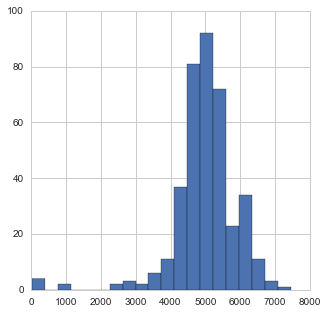

In [7]:
number_of_detected_genes = (expression_logged > 1).sum()

figheight = 5
figwidth = 5

fig, ax = plt.subplots(figsize=(figwidth, figheight))
number_of_detected_genes.hist(bins=20)

In [8]:
genes_of_interest = (expression_logged > 1).sum(axis=1) >= 5
expression_logged_filtered = expression_logged.loc[genes_of_interest]
print(expression_logged_filtered.shape)

(18211, 384)


In [9]:
expression_logged_filtered = expression_logged_filtered.T
cells_of_interest = (expression_logged.T > 1).sum(axis=1) >= 2000
expression_logged_filtered=expression_logged_filtered.loc[cells_of_interest]
print(expression_logged_filtered.shape)

(378, 18211)


In [10]:
count_filtered = count.loc[expression_logged_filtered.T.index]
count_filtered = count_filtered.T.loc[expression_logged_filtered.index]
count_filtered.shape

(378, 18211)

In [11]:
count_filtered.T.to_csv("NFI_scRNA_count_filtered.csv")

In [11]:
metadata_filtered = metadata.loc[expression_logged_filtered.index]
metadata_filtered.shape

(378, 4)

In [12]:
##minBiolDisp <- 1.2^2

In [13]:
sig_genes = pd.read_csv("NFI_scRNA_count_filtered_highVariable.csv", index_col=0)
sig_genes.shape

(18146, 1)

In [14]:
expression_logged_filtered_sig = expression_logged_filtered.T.iloc[:18146,]
expression_logged_filtered_sig.shape

(18146, 378)

In [15]:
expression_logged_filtered_sig = expression_logged_filtered_sig.loc[sig_genes["x"]]
expression_logged_filtered_sig.shape

(4710, 378)

In [16]:
expression_logged_filtered_sig = expression_logged_filtered_sig.T
expression_logged_filtered_sig.shape

(378, 4710)

[ 5.83  3.01  2.24  1.89  1.38  1.22  1.01  0.84  0.76  0.66  0.59  0.56
  0.55  0.51  0.5   0.47  0.46  0.44  0.44  0.43  0.43  0.42  0.42  0.41
  0.41  0.41  0.4   0.4   0.4   0.39  0.39  0.39  0.39  0.38  0.38  0.38
  0.38  0.37  0.37  0.37  0.37  0.36  0.36  0.36  0.36  0.36  0.35  0.35
  0.35  0.35  0.35  0.35  0.34  0.34  0.34  0.34  0.34  0.34  0.33  0.33
  0.33  0.33  0.33  0.33  0.33  0.32  0.32  0.32  0.32  0.32  0.32  0.31
  0.31  0.31  0.31  0.31  0.31  0.31  0.31  0.31  0.3   0.3   0.3   0.3
  0.3   0.3   0.3   0.29  0.29  0.29  0.29  0.29  0.29  0.29  0.29  0.29
  0.29  0.28  0.28  0.28  0.28  0.28  0.28  0.28  0.28  0.28  0.27  0.27
  0.27  0.27  0.27  0.27  0.27  0.27  0.27  0.27  0.27  0.26  0.26  0.26
  0.26  0.26  0.26  0.26  0.26  0.25  0.25  0.25  0.25  0.25  0.25  0.25
  0.25  0.25  0.25  0.25  0.25  0.25  0.24  0.24  0.24  0.24  0.24  0.24
  0.24  0.24  0.24  0.24  0.24  0.24  0.23  0.23  0.23  0.23  0.23  0.23
  0.23  0.23  0.23  0.23  0.23  0.23  0.23  0.22  0.

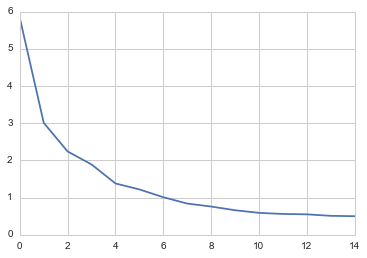

In [17]:
pca = PCA(n_components=None)
pca.fit(expression_logged_filtered_sig)
var= np.round(pca.explained_variance_ratio_, decimals=4)*100
var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
print(var)
plt.plot(var[0:15])

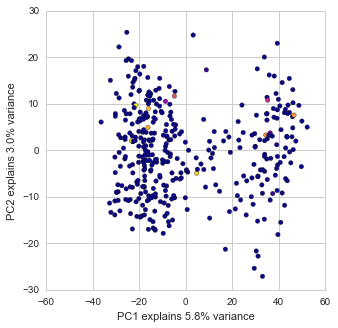

In [18]:
smusher = PCA()
smushed = pd.DataFrame(smusher.fit_transform(expression_logged_filtered_sig),
                      index = expression_logged_filtered_sig.index)

figheight = 5
figwidth = 5

fig, ax = plt.subplots(figsize=(figwidth, figheight))
y = expression_logged_filtered.T.loc["ENSMUSG00000029167_Ppargc1a"]
ax.scatter(smushed[0],smushed[7],c=y,s=20,cmap="plasma")
#ax.scatter(smushed[0],smushed[2],c=metadata_filtered["Epi"],s=20)

# maturity_color = ['mediumturquoise' if x == 'effector' else 'teal' for x in meta_data['cell_state_myc']]
xlabel = 'PC1 explains {:.1f}% variance'.format(100*smusher.explained_variance_ratio_[0])
ylabel = 'PC2 explains {:.1f}% variance'.format(100*smusher.explained_variance_ratio_[1])

ax.set_xlabel(xlabel)
ax.set_ylabel(ylabel)

In [18]:
##PC1 weights gene list
featureWeights1 = list(smusher.components_[0])
weights = pd.DataFrame(data = featureWeights1,index = expression_logged_filtered_sig.T.index)
weights.to_csv('temp_test_PC1.csv')
featureWeights2 = list(smusher.components_[1])
weights = pd.DataFrame(data = featureWeights2,index = expression_logged_filtered_sig.T.index)
weights.to_csv('temp_test_PC2.csv')
featureWeights3 = list(smusher.components_[2])
weights = pd.DataFrame(data = featureWeights3,index = expression_logged_filtered_sig.T.index)
weights.to_csv('temp_test_PC3.csv')
featureWeights4 = list(smusher.components_[3])
weights = pd.DataFrame(data = featureWeights3,index = expression_logged_filtered_sig.T.index)
weights.to_csv('temp_test_PC4.csv')

In [19]:
smushed_subset = smushed.ix[:,0:9]
smushed_subset.head()

,0,1,2,3,4,5,6,7,8,9
cKO_1_A1,-24.085003,74.949307,5.362322,11.292107,-3.230426,21.239633,-24.456819,3.718790,-2.345663,3.731037
cKO_1_A11,-17.863274,-16.334774,11.755958,24.232377,-9.372178,-4.811640,-1.765329,-7.927132,-2.891774,12.741299
cKO_1_A12,11.492369,87.370168,-13.593171,22.664070,20.039410,14.303208,-20.462452,-0.673651,-4.994541,-6.392662
cKO_1_B1,3.159820,-6.207964,10.707794,2.247404,-2.639528,21.165088,10.226863,24.785134,-10.785911,-12.871446
cKO_1_B10,49.915339,-0.287950,-1.565554,7.481503,7.666978,-2.675661,-2.688971,6.279675,-8.452947,-0.326037


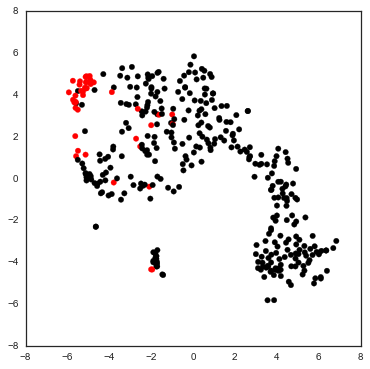

In [20]:
smusher_2 = TSNE(perplexity=100,early_exaggeration=8.0,learning_rate=100,n_iter=3000,metric='euclidean',random_state=1)

smushed_2 = pd.DataFrame(smusher_2.fit_transform(smushed_subset),index = smushed_subset.index)

figheight = 6
figwidth = 6

sns.set_style("white")
fig, ax = plt.subplots(figsize=(figwidth, figheight))
y = expression_logged_filtered.T.loc["ENSMUSG00000012350_Ehf"]
#ax.scatter(smushed_2[0],smushed_2[1],c=y,s=30,cmap='plasma')
#ax.scatter(smushed_2[0],smushed_2[1],c=metadata_filtered["identity_color"],s=40)
ax.scatter(smushed_2[0],smushed_2[1],color=metadata_filtered["Epi"],s=30)

In [21]:
metadata_filtered = pd.read_csv("NFI_scRNA_metadata_filtered.csv",index_col=0)
metadata_filtered.head()

,identity,identity_color,batch,Epi,cluster,cluster_color,c0,c1,c2,c3,c4,c5,c6,dKO_new_cluster
cKO_1_A1,cKO,DarkSlateBlue,blue,black,5,#8da0cb,0,0,0,0,0,1,0,0
cKO_1_A11,cKO,DarkSlateBlue,blue,black,4,#e68ac3,0,0,0,0,1,0,0,0
cKO_1_A12,cKO,DarkSlateBlue,blue,black,5,#8da0cb,0,0,0,0,0,1,0,0
cKO_1_B1,cKO,DarkSlateBlue,blue,black,1,#66c2a5,0,1,0,0,0,0,0,0
cKO_1_B10,cKO,DarkSlateBlue,blue,black,0,#fa8e63,1,0,0,0,0,0,0,0


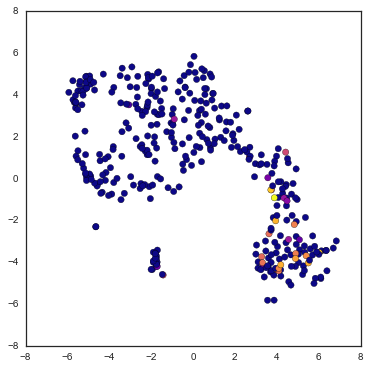

In [22]:
sns.set_style("white")
fig, ax = plt.subplots(figsize=(figwidth, figheight))
y = expression_logged_filtered.T.loc["ENSMUSG00000028989_Angptl7"]
ax.scatter(smushed_2[0],smushed_2[1],c=y,s=40,cmap='plasma')
#ax.scatter(smushed_2[0],smushed_2[1],c=metadata_filtered["identity_color"],s=40)
#ax.scatter(smushed_2[0],smushed_2[1],color=metadata_filtered["Epi"],s=30)

In [23]:
metadata_filtered_cKO = metadata_filtered.loc[metadata_filtered["identity"]=="cKO"]
metadata_filtered_cKO.shape

(205, 14)

In [24]:
smushed_2_cKO = smushed_2.loc[metadata_filtered_cKO.index]
smushed_2_cKO.shape

(205, 2)

In [25]:
expression_logged_filtered_cKO = expression_logged_filtered.loc[metadata_filtered_cKO.index]
expression_logged_filtered_cKO.shape

(205, 18211)

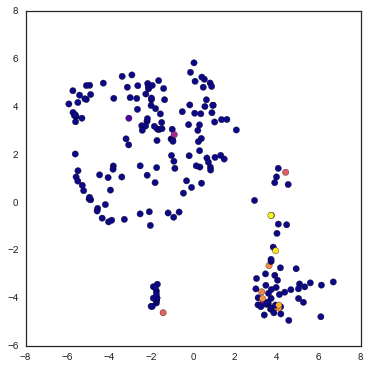

In [27]:
figheight = 6
figwidth = 6

sns.set_style("white")
fig, ax = plt.subplots(figsize=(figwidth, figheight))
y = expression_logged_filtered_cKO.T.loc["ENSMUSG00000028989_Angptl7"]
ax.scatter(smushed_2_cKO[0],smushed_2_cKO[1],c=y,s=40,cmap='plasma')
#ax.scatter(smushed_2_cKO[0],smushed_2_cKO[1],c=metadata_filtered_cKO["identity_color"],s=40)
#ax.scatter(smushed_2[0],smushed_2[1],color=metadata_filtered["Epi"],s=30)

In [28]:
metadata_filtered_dKO = metadata_filtered.loc[metadata_filtered["identity"]=="dKO"]
metadata_filtered_dKO.shape

(173, 14)

In [29]:
smushed_2_dKO = smushed_2.loc[metadata_filtered_dKO.index]
smushed_2_dKO.shape

(173, 2)

In [512]:
smushed_2_dKO.to_csv("temp_dKO_smushed_2.csv")

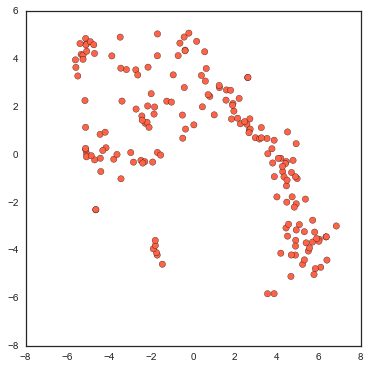

In [30]:
figheight = 6
figwidth = 6

sns.set_style("white")
fig, ax = plt.subplots(figsize=(figwidth, figheight))
y = expression_logged_filtered.T.loc["ENSMUSG00000074934_Grem1"]
#ax.scatter(smushed_2[0],smushed_2[1],c=y,s=30,cmap='plasma')
ax.scatter(smushed_2_dKO[0],smushed_2_dKO[1],c=metadata_filtered_dKO["identity_color"],s=40)
#ax.scatter(smushed_2[0],smushed_2[1],color=metadata_filtered["Epi"],s=30)

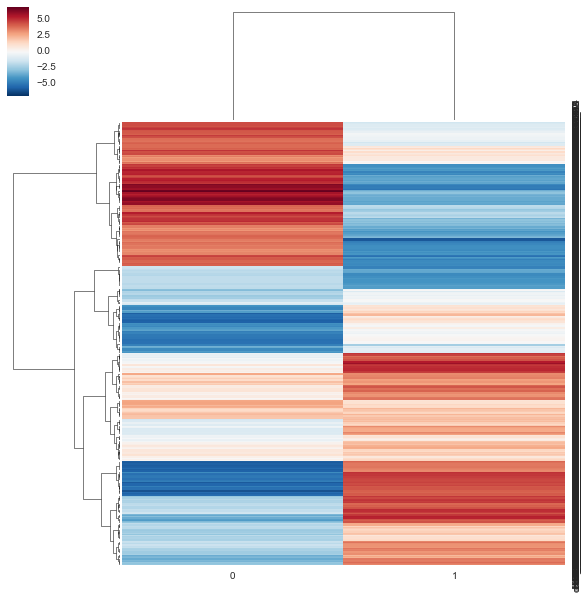

In [31]:
g = sns.clustermap(smushed_2, method='ward', metric='cityblock')

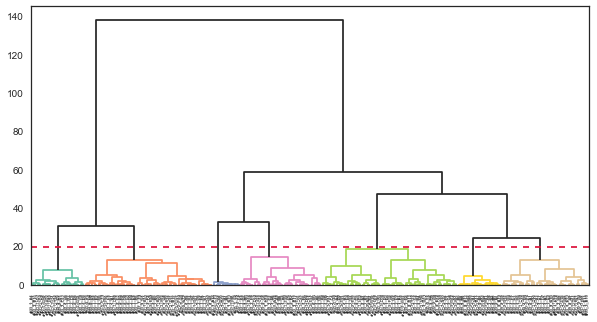

In [32]:
figwidth, figheight = 10, 5
fig, ax = plt.subplots(figsize=(figwidth, figheight))

# Make the clustering dendrogram colors not suck

hierarchy.set_link_color_palette(list(map(mpl.colors.rgb2hex, sns.color_palette('Set2',7))))

cluster_threshold = 20

cden = hierarchy.dendrogram(g.dendrogram_row.linkage, 
                            color_threshold=cluster_threshold, 
                            labels=smushed.index,
                            above_threshold_color='#262626')
plt.axhline(cluster_threshold, color='Crimson', linestyle='--');
plt.xticks(rotation=90, fontsize=4);

In [33]:
"""
Cluster assignment and coloring functions from Macaulay supplemental notebooks
"""

class Clusters(dict):
    def _repr_html_(self):
        html = '<table style="border: 0;">'
        for c in self:
            hx = mpl.colors.rgb2hex(mpl.colors.colorConverter.to_rgb(c))
            html += '<tr style="border: 0;">' \
            '<td style="background-color: {0}; ' \
                       'border: 0;">' \
            '<code style="background-color: {0};">'.format(hx)
            html += c + '</code></td>'
            html += '<td style="border: 0"><code>' 
            html += repr(self[c]) + '</code>'
            html += '</td></tr>'

        html += '</table>'

        return html

def get_cluster_classes(den, label='ivl'):
    cluster_idxs = defaultdict(list)
    for c, pi in zip(den['color_list'], den['icoord']):
        for leg in pi[1:3]:
            i = (leg - 5.0) / 10.0
            if abs(i - int(i)) < 1e-5:
                cluster_idxs[c].append(int(i))

    cluster_classes = Clusters()
    for c, l in cluster_idxs.items():
        i_l = list(sorted([den[label][i] for i in l]))
        cluster_classes[c] = i_l

    return cluster_classes

def get_cluster_limits(den):
    cluster_idxs = defaultdict(list)
    for c, pi in zip(den['color_list'], den['icoord']):
        for leg in pi[1:3]:
            i = (leg - 5.0) / 10.0
            if abs(i - int(i)) < 1e-5:
                cluster_idxs[c].append(int(i))

    cluster_limits = Clusters()
    for c in cluster_idxs:
        cluster_limits[c] = (min(cluster_idxs[c]), max(cluster_idxs[c]))
    
    return cluster_limits

In [34]:
clusters = get_cluster_classes(cden)
# --- Get cluster-defined colors for each cell, for this threshold --- #
cluster_cell_colors = []
for cell in smushed_subset.index:
    for color in clusters:
        if cell in clusters[color]:
            cluster_cell_colors.append(color)
            break

clustered_unique_colors = set(cluster_cell_colors)
clustered_color_to_integer = dict(zip(
        clustered_unique_colors, 
        range(len(clustered_unique_colors))))
print(clustered_color_to_integer)

cluster_integers = [clustered_color_to_integer[x] 
                               for x in cluster_cell_colors]

{'#e4c494': 4, '#fa8e63': 0, '#66c2a5': 1, '#8da0cb': 5, '#e68ac3': 3, '#a7d854': 2, '#ffd92f': 6}


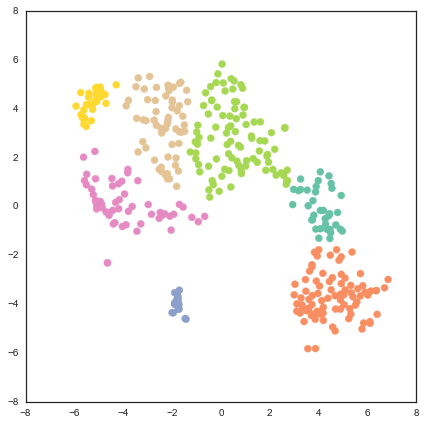

In [35]:
figheight = 7
figwidth = 7


fig, ax = plt.subplots(figsize=(figwidth, figheight))
#plt.xlim(-8,8)
#plt.ylim(-8,8)
ax.scatter(smushed_2[0],smushed_2[1],color=cluster_cell_colors,s=50)


In [33]:
metadata_filtered["cluster"] = cluster_integers
metadata_filtered.head()

,identity,identity_color,batch,Epi,cluster,cluster_color,c0,c1,c2,c3,c4,c5,c6,dKO_new_cluster
cKO_1_A1,cKO,DarkSlateBlue,blue,black,3,#8da0cb,0,0,0,0,0,1,0,0
cKO_1_A11,cKO,DarkSlateBlue,blue,black,4,#e68ac3,0,0,0,0,1,0,0,0
cKO_1_A12,cKO,DarkSlateBlue,blue,black,3,#8da0cb,0,0,0,0,0,1,0,0
cKO_1_B1,cKO,DarkSlateBlue,blue,black,6,#66c2a5,0,1,0,0,0,0,0,0
cKO_1_B10,cKO,DarkSlateBlue,blue,black,0,#fa8e63,1,0,0,0,0,0,0,0


In [279]:
metadata_filtered.to_csv("NFI_scRNA_metadata_filtered.csv.csv")

In [36]:
metadata_filtered = pd.read_csv("NFI_scRNA_metadata_filtered.csv", index_col=0)
metadata_filtered.head()

,identity,identity_color,batch,Epi,cluster,cluster_color,c0,c1,c2,c3,c4,c5,c6,dKO_new_cluster
cKO_1_A1,cKO,DarkSlateBlue,blue,black,5,#8da0cb,0,0,0,0,0,1,0,0
cKO_1_A11,cKO,DarkSlateBlue,blue,black,4,#e68ac3,0,0,0,0,1,0,0,0
cKO_1_A12,cKO,DarkSlateBlue,blue,black,5,#8da0cb,0,0,0,0,0,1,0,0
cKO_1_B1,cKO,DarkSlateBlue,blue,black,1,#66c2a5,0,1,0,0,0,0,0,0
cKO_1_B10,cKO,DarkSlateBlue,blue,black,0,#fa8e63,1,0,0,0,0,0,0,0


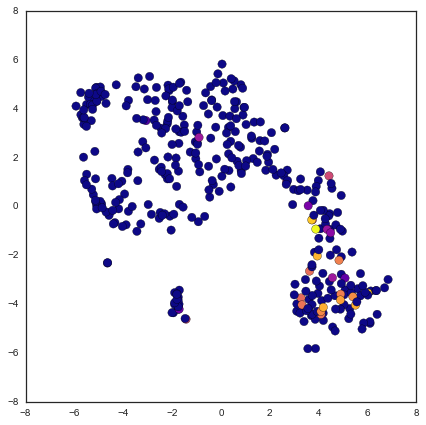

In [37]:
figheight = 7
figwidth = 7


fig, ax = plt.subplots(figsize=(figwidth, figheight))
#plt.xlim(-8,8)
#plt.ylim(-8,8)

#ax.scatter(smushed_2[0],smushed_2[1],color=metadata_filtered["cluster_color"],s=70)

y = expression_logged_filtered.T.loc["ENSMUSG00000028989_Angptl7"]
ax.scatter(smushed_2[0],smushed_2[1],c=y,s=70,cmap='plasma')

In [38]:
# no Epi

In [39]:
metadata_filtered_noEpi = metadata_filtered.loc[metadata_filtered["cluster"]!=6]
metadata_filtered_noEpi.shape

(348, 14)

In [40]:
expression_logged_filtered_noEpi = expression_logged_filtered.loc[metadata_filtered_noEpi.index]
expression_logged_filtered_noEpi.shape

(348, 18211)

   # cKO only figure

In [41]:
metadata_filtered_cKO = metadata_filtered_noEpi.loc[metadata_filtered_noEpi["identity"]=="cKO"]
metadata_filtered_cKO.shape

(189, 14)

In [42]:
smushed_2_cKO = smushed_2.loc[metadata_filtered_cKO.index]
smushed_2_cKO.shape

(189, 2)

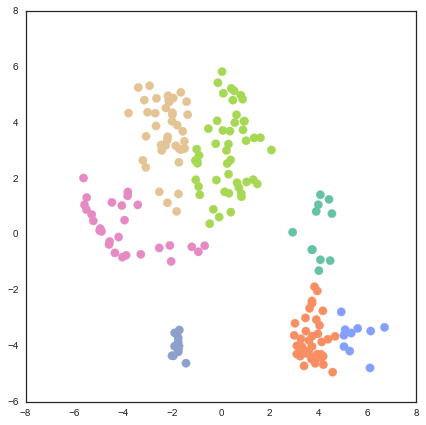

In [43]:
figheight = 7
figwidth = 7


fig, ax = plt.subplots(figsize=(figwidth, figheight))
#plt.xlim(-8,8)
#plt.ylim(-8,8)

ax.scatter(smushed_2_cKO[0],smushed_2_cKO[1],color=metadata_filtered_cKO["cluster_color"],s=70)

y = expression_logged_filtered.T.loc["ENSMUSG00000075602_Ly6a"]
#ax.scatter(smushed_2[0],smushed_2[1],c=y,s=70,cmap='plasma')

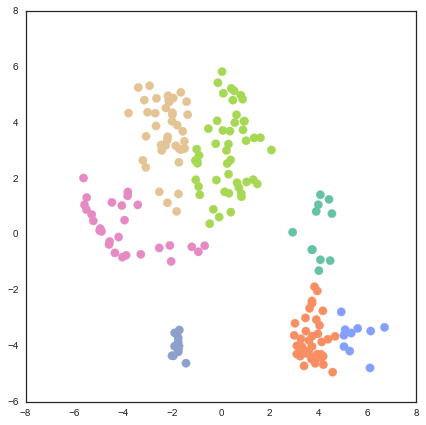

In [44]:
figheight = 7
figwidth = 7


fig, ax = plt.subplots(figsize=(figwidth, figheight))
#plt.xlim(-8,8)
#plt.ylim(-8,8)

ax.scatter(smushed_2_cKO[0],smushed_2_cKO[1],color=metadata_filtered_cKO["cluster_color"],s=70)

y = expression_logged_filtered.T.loc["ENSMUSG00000075602_Ly6a"]
#ax.scatter(smushed_2[0],smushed_2[1],c=y,s=70,cmap='plasma')

In [45]:
expression_logged_filtered_cKO = expression_logged_filtered_noEpi.loc[metadata_filtered_cKO.index]
expression_logged_filtered_cKO.shape

(189, 18211)

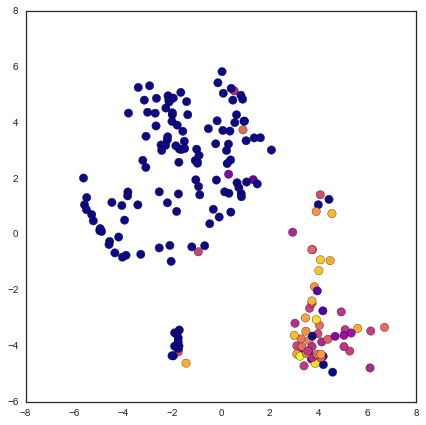

In [46]:
figheight = 7
figwidth = 7


fig, ax = plt.subplots(figsize=(figwidth, figheight))
#plt.xlim(-8,8)
#plt.ylim(-8,8)

#ax.scatter(smushed_2_cKO[0],smushed_2_cKO[1],color=metadata_filtered_cKO["identity_color"],s=70)

y = expression_logged_filtered_cKO.T.loc["ENSMUSG00000000247_Lhx2"]
ax.scatter(smushed_2_cKO[0],smushed_2_cKO[1],c=y,s=70,cmap='plasma')

# For TPM average

In [47]:
metadata_filtered_cKO.head()

,identity,identity_color,batch,Epi,cluster,cluster_color,c0,c1,c2,c3,c4,c5,c6,dKO_new_cluster
cKO_1_A1,cKO,DarkSlateBlue,blue,black,5,#8da0cb,0,0,0,0,0,1,0,0
cKO_1_A11,cKO,DarkSlateBlue,blue,black,4,#e68ac3,0,0,0,0,1,0,0,0
cKO_1_A12,cKO,DarkSlateBlue,blue,black,5,#8da0cb,0,0,0,0,0,1,0,0
cKO_1_B1,cKO,DarkSlateBlue,blue,black,1,#66c2a5,0,1,0,0,0,0,0,0
cKO_1_B10,cKO,DarkSlateBlue,blue,black,0,#fa8e63,1,0,0,0,0,0,0,0


In [49]:
metadata_filtered_cKO.to_csv("temp_cKO_metadata.csv")

In [48]:
meta = pd.read_csv("temp_cKO_metadata.csv", index_col =0 )
print(meta.shape)
meta.head()

(201, 14)


,identity,identity_color,batch,Epi,cluster,cluster_color,c0,c1,c2,c3,c4,c5,c6,dKO_new_cluster
cKO_1_A1,cKO,DarkSlateBlue,blue,black,5,#8da0cb,0,0,0,0,0,1,0,0
cKO_1_A11,cKO,DarkSlateBlue,blue,black,4,#e68ac3,0,0,0,0,1,0,0,0
cKO_1_A12,cKO,DarkSlateBlue,blue,black,5,#8da0cb,0,0,0,0,0,1,0,0
cKO_1_B1,cKO,DarkSlateBlue,blue,black,1,#66c2a5,0,1,0,0,0,0,0,0
cKO_1_B10,cKO,DarkSlateBlue,blue,black,0,#fa8e63,1,0,0,0,0,0,0,0


In [49]:
expression_cKO = expression.T.loc[meta.index]
expression_cKO.shape

(201, 46609)

In [72]:
expression_cKO_subset = expression_cKO.loc[meta.loc[meta["cluster_color"] == "#fa8e63"].index]
expression_cKO_subset.shape

(39, 46609)

In [73]:
expression_cKO_subset_filter = expression_cKO_subset.T.loc[expression_logged_filtered.T.index]
expression_cKO_subset_filter.shape

(18211, 39)

In [74]:
expression_cKO_subset_filter.to_csv("cKO_TPM_average_BU.csv")

# dKO only

In [67]:
metadata_filtered_dKO = metadata_filtered_noEpi.loc[metadata_filtered_noEpi["identity"]=="dKO"]
smushed_2_dKO = smushed_2.loc[metadata_filtered_dKO.index]
smushed_2_dKO.shape

(159, 2)

In [68]:
expression_logged_filtered_dKO = expression_logged_filtered_noEpi.loc[metadata_filtered_dKO.index]
expression_logged_filtered_dKO.shape

(159, 18211)

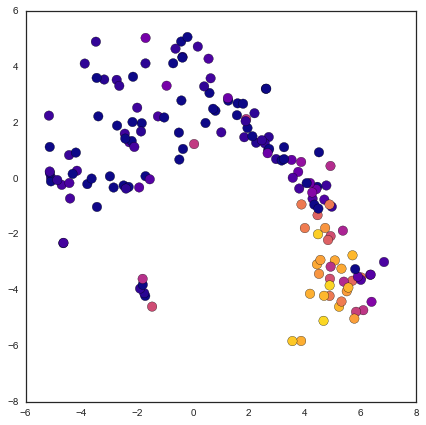

In [79]:
figheight = 7
figwidth = 7


fig, ax = plt.subplots(figsize=(figwidth, figheight))
#plt.xlim(-8,8)
#plt.ylim(-8,8)

#ax.scatter(smushed_2_dKO[0],smushed_2_dKO[1],color=metadata_filtered_dKO["identity_color"],s=70)

y = expression_logged_filtered_dKO.T.loc["ENSMUSG00000016494_Cd34"]
ax.scatter(smushed_2_dKO[0],smushed_2_dKO[1],c=y,s=90,cmap='plasma',vmax=9.5)

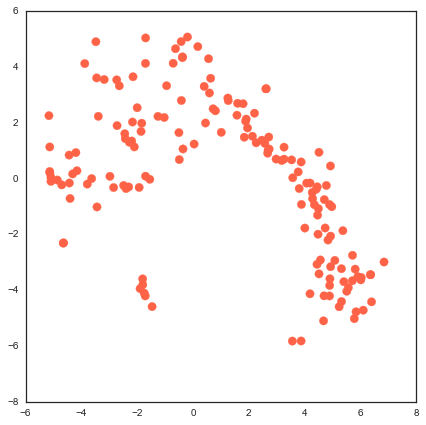

In [77]:
figheight = 7
figwidth = 7


fig, ax = plt.subplots(figsize=(figwidth, figheight))
#plt.xlim(-8,8)
#plt.ylim(-8,8)

ax.scatter(smushed_2_dKO[0],smushed_2_dKO[1],color=metadata_filtered_dKO["identity_color"],s=70)

y = expression_logged_filtered.T.loc["ENSMUSG00000075602_Ly6a"]
#ax.scatter(smushed_2[0],smushed_2[1],c=y,s=70,cmap='plasma')

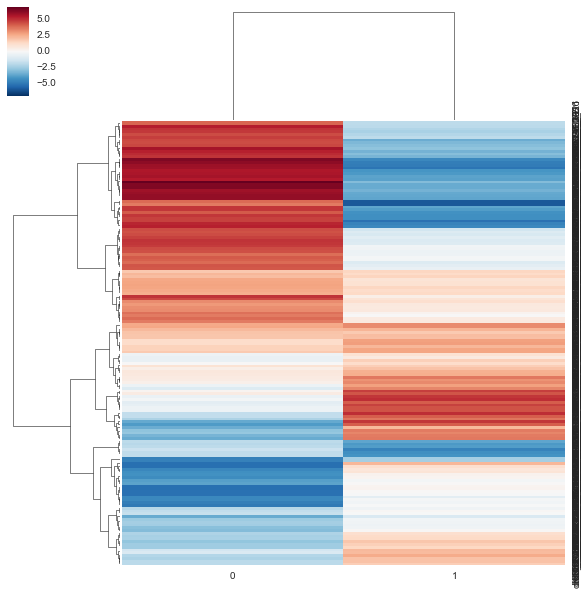

In [84]:
g = sns.clustermap(smushed_2_dKO, method='ward', metric='euclidean')

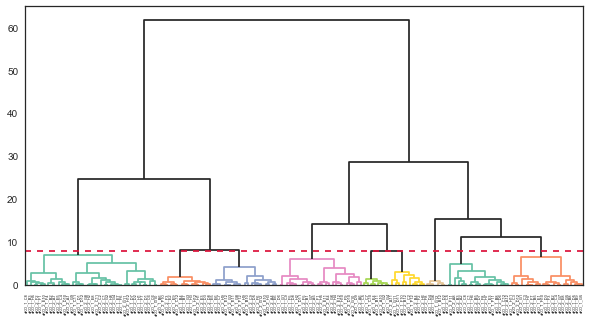

In [89]:
figwidth, figheight = 10, 5
fig, ax = plt.subplots(figsize=(figwidth, figheight))

# Make the clustering dendrogram colors not suck

hierarchy.set_link_color_palette(list(map(mpl.colors.rgb2hex, sns.color_palette('Set2',7))))

cluster_threshold = 8

cden = hierarchy.dendrogram(g.dendrogram_row.linkage, 
                            color_threshold=cluster_threshold, 
                            labels=smushed.index,
                            above_threshold_color='#262626')
plt.axhline(cluster_threshold, color='Crimson', linestyle='--');
plt.xticks(rotation=90, fontsize=4);

In [90]:
"""
Cluster assignment and coloring functions from Macaulay supplemental notebooks
"""

class Clusters(dict):
    def _repr_html_(self):
        html = '<table style="border: 0;">'
        for c in self:
            hx = mpl.colors.rgb2hex(mpl.colors.colorConverter.to_rgb(c))
            html += '<tr style="border: 0;">' \
            '<td style="background-color: {0}; ' \
                       'border: 0;">' \
            '<code style="background-color: {0};">'.format(hx)
            html += c + '</code></td>'
            html += '<td style="border: 0"><code>' 
            html += repr(self[c]) + '</code>'
            html += '</td></tr>'

        html += '</table>'

        return html

def get_cluster_classes(den, label='ivl'):
    cluster_idxs = defaultdict(list)
    for c, pi in zip(den['color_list'], den['icoord']):
        for leg in pi[1:3]:
            i = (leg - 5.0) / 10.0
            if abs(i - int(i)) < 1e-5:
                cluster_idxs[c].append(int(i))

    cluster_classes = Clusters()
    for c, l in cluster_idxs.items():
        i_l = list(sorted([den[label][i] for i in l]))
        cluster_classes[c] = i_l

    return cluster_classes

def get_cluster_limits(den):
    cluster_idxs = defaultdict(list)
    for c, pi in zip(den['color_list'], den['icoord']):
        for leg in pi[1:3]:
            i = (leg - 5.0) / 10.0
            if abs(i - int(i)) < 1e-5:
                cluster_idxs[c].append(int(i))

    cluster_limits = Clusters()
    for c in cluster_idxs:
        cluster_limits[c] = (min(cluster_idxs[c]), max(cluster_idxs[c]))
    
    return cluster_limits

In [91]:
clusters = get_cluster_classes(cden)
# --- Get cluster-defined colors for each cell, for this threshold --- #
cluster_cell_colors = []
for cell in smushed_subset.index:
    for color in clusters:
        if cell in clusters[color]:
            cluster_cell_colors.append(color)
            break

clustered_unique_colors = set(cluster_cell_colors)
clustered_color_to_integer = dict(zip(
        clustered_unique_colors, 
        range(len(clustered_unique_colors))))
print(clustered_color_to_integer)

cluster_integers = [clustered_color_to_integer[x] 
                               for x in cluster_cell_colors]

{'#ffd92f': 0, '#fa8e63': 3, '#8da0cb': 4, '#a7d854': 5, '#66c2a5': 6, '#e4c494': 1, '#e68ac3': 2}


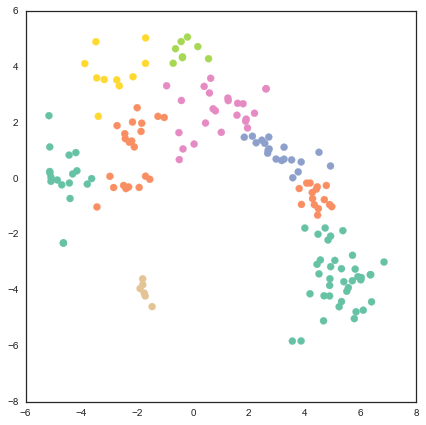

In [92]:
figheight = 7
figwidth = 7


fig, ax = plt.subplots(figsize=(figwidth, figheight))
#plt.xlim(-8,8)
#plt.ylim(-8,8)
ax.scatter(smushed_2_dKO[0],smushed_2_dKO[1],color=cluster_cell_colors,s=50)


In [93]:
metadata_filtered_dKO["new_cluster"] = cluster_integers
metadata_filtered_dKO.head()

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


,identity,identity_color,batch,Epi,cluster,cluster_color,c0,c1,c2,c3,c4,c5,c6,new_cluster
dKO_1_A1,dKO,Tomato,blue,black,5,#8da0cb,0,0,0,0,0,1,0,1
dKO_1_A10,dKO,Tomato,blue,black,0,#fa8e63,1,0,0,0,0,0,0,6
dKO_1_A11,dKO,Tomato,blue,black,0,#859FFF,1,0,0,0,0,0,0,6
dKO_1_A12,dKO,Tomato,blue,black,1,#66c2a5,0,1,0,0,0,0,0,3
dKO_1_A3,dKO,Tomato,blue,black,4,#e68ac3,0,0,0,0,1,0,0,3


In [94]:
metadata_filtered_dKO.to_csv("NFI_scRNA_metadata_filtered_dKO.csv")

In [47]:
#all cells

In [115]:
smushed_2_noEpi = smushed_2.loc[metadata_filtered_noEpi.index]
smushed_2_noEpi.shape

(348, 2)

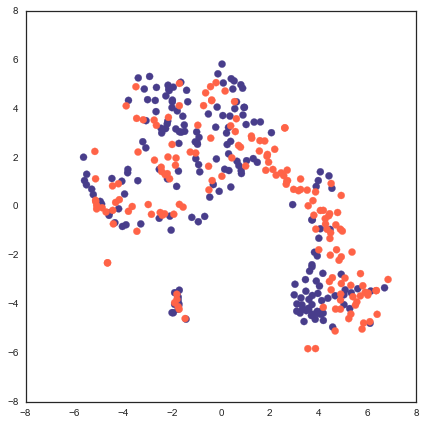

In [116]:
figheight = 7
figwidth = 7


fig, ax = plt.subplots(figsize=(figwidth, figheight))
#plt.xlim(-8,8)
#plt.ylim(-8,8)

ax.scatter(smushed_2_noEpi[0],smushed_2_noEpi[1],color=metadata_filtered_noEpi["identity_color"],s=50)

y = expression_logged_filtered.T.loc["ENSMUSG00000075602_Ly6a"]
#ax.scatter(smushed_2[0],smushed_2[1],c=y,s=70,cmap='plasma')

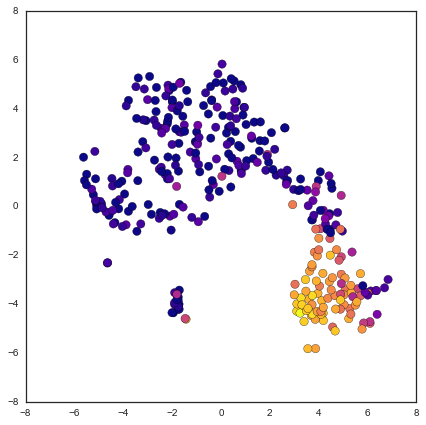

In [118]:
figheight = 7
figwidth = 7


fig, ax = plt.subplots(figsize=(figwidth, figheight))
#plt.xlim(-8,8)
#plt.ylim(-8,8)

#ax.scatter(smushed_2_noEpi[0],smushed_2_noEpi[1],color=metadata_filtered_noEpi["identity_color"],s=50)

y = expression_logged_filtered_noEpi.T.loc["ENSMUSG00000016494_Cd34"]
ax.scatter(smushed_2_noEpi[0],smushed_2_noEpi[1],c=y,s=70,cmap='plasma')

In [57]:
expression_logged_filtered.shape

(378, 18211)

(348, 18211)